# K-sredina klasterovanje

In [1]:
import pandas as pd

## Podaci

In [2]:
df = pd.read_csv('../data/dogs.csv')

In [3]:
df

,breed,height,weight
0,Border Collie,20,45
1,Boston Terrier,16,20
2,Brittany Spaniel,18,35
3,Bullmastiff,27,120
4,Chihuahua,8,8
5,German Shepherd,25,78
6,Golden Retriever,23,70
7,Great Dane,32,160
8,Portuguese Water Dog,21,50
9,Standard Poodle,19,65


U ovom slučaju rasa psa **nije klasa**, jer za svaka instanca opisuje različitu rasu psa.

Ako želimo da vršimo klasterovanje na osnovu kategoričkog atributa, tada se vrši binarizacija tih atributa (npr. *one hot* binarizacija).

## Preprocesiranje

In [4]:
feature_names = list(df.columns[1:])
feature_names

['height', 'weight']

In [5]:
X = df[feature_names]
X

,height,weight
0,20,45
1,16,20
2,18,35
3,27,120
4,8,8
5,25,78
6,23,70
7,32,160
8,21,50
9,19,65


Za klasterovanje podataka nije potrebno deliti skup na trening i test skupove.

In [6]:
from sklearn.preprocessing import MinMaxScaler

Kako algoritam *k-sredina* koristi euklidsko rastojanje za svoja izračunavanje, moramo da normalizujemo podatke.
U tu svrhu može dase koristi *MinMaxScaler* koji vrednostni nekog atributa za različite instance preslikava na neki zadati interval.

In [7]:
scaler = MinMaxScaler()

In [8]:
scaler.fit(X)

MinMaxScaler()

In [9]:
X = scaler.transform(X)

In [10]:
X = pd.DataFrame(X, columns=feature_names)

In [11]:
X

,height,weight
0,0.538462,0.248366
1,0.384615,0.084967
2,0.461538,0.183007
3,0.807692,0.738562
4,0.076923,0.006536
5,0.730769,0.464052
6,0.653846,0.411765
7,1.000000,1.000000
8,0.576923,0.281046
9,0.500000,0.379085


## Treniranje

In [12]:
from sklearn.cluster import KMeans

In [13]:
kmeans = KMeans(n_clusters=2, init='k-means++')

Parametri funkcije *KMeans*:
- init: metod incizalizacije pocetnih centroida (*k-means++* je heuristika koja bolje radi od nasumičnog biranja početnih centroida
- n_init: broj puta kojih će se pokrenuti klasterovanje kako bi se uporedili dobijene vrednosti
- max_iter - maksimalni broj iteracija
- toI - tolerancija na greške brojeva u pokrenom zarezu

In [14]:
kmeans.fit(X)

KMeans(n_clusters=2)

In [15]:
kmeans.cluster_centers_

array([[0.90384615, 0.86928105],
       [0.43589744, 0.22875817]])

Srednje kvadratna greška:

In [16]:
kmeans.inertia_

0.7828436301619693

Oznake klastera kojima pripadaju pojedinačne instance:

In [17]:
kmeans.labels_

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1], dtype=int32)

## Vizuelizacija

In [18]:
from matplotlib import pyplot as plt

In [19]:
colors = ['red', 'green', 'blue', 'yellow', 'purple', 'grey', 'black', 'orange', 'cyan', 'pink', 'brown']

In [20]:
X.shape

(11, 2)

In [21]:
len(colors)

11

Za različiti broj klastera i za različite početne heuristike iscrtavamo kreirane klastere.

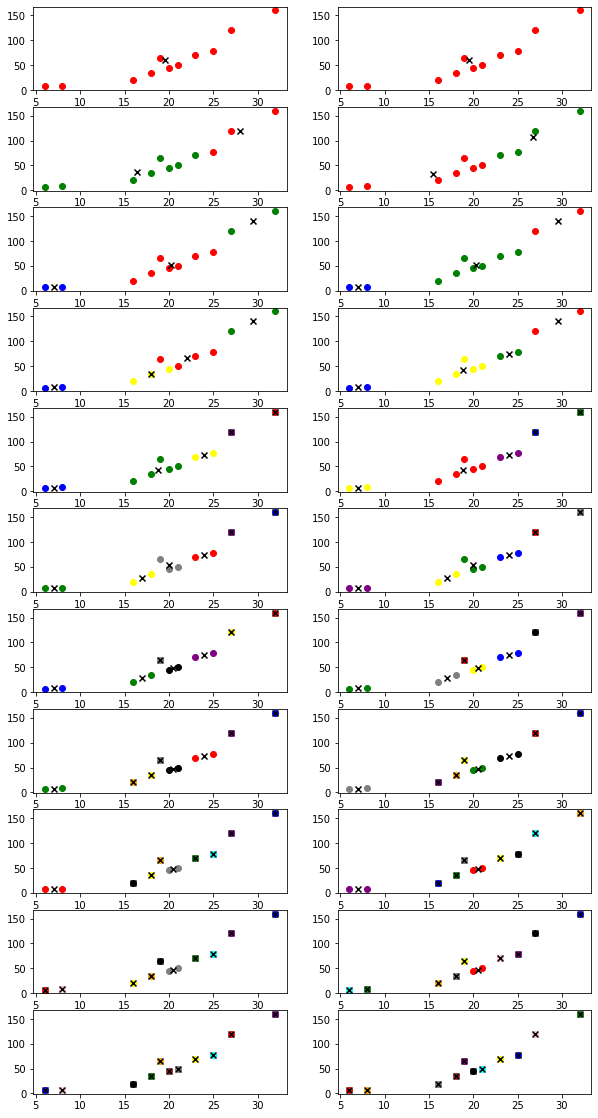

In [22]:
ks = range(1, X.shape[0] + 1) # [ )
init_methods = ['k-means++', 'random']

fig = plt.figure(figsize=(10,20))

inertias = []

plt_index = 1
for k in ks:
    for init_method in init_methods:
        kmeans = KMeans(n_clusters=k, init=init_method)
        kmeans.fit(X)
        
        df['label'] = kmeans.labels_
        
        fig.add_subplot(len(ks), len(init_methods), plt_index)
        
        for label in range(k):
            cluster = df[df['label'] == label]
            plt.scatter(cluster['height'], cluster['weight'], color=colors[label])
            
        centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=feature_names)
        plt.scatter(centroids['height'], centroids['weight'], marker='x', color='black')
        
        plt_index += 1
        
    inertias.append(kmeans.inertia_)
        
plt.show()

Predstavljamo zavisnost srednje kvadratne greške od broja klastera.
Za odabir optimalnog broja klastera možemo da koristimo *pravilo lakta*: tamo gde prestane naglo da opada kriva, taj broj klastera biramo.

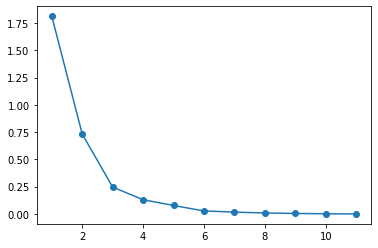

In [23]:
plt.plot(ks, inertias, marker='o')